<a href="https://colab.research.google.com/github/Nov05/yelp-dataset-challenge/blob/master/notebooks/2019_12_14_cafe_sample_LDA_LSI_topic_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# created by nov05 on 2019-12-14

Complete Guide to Topic Modeling    
https://nlpforhackers.io/topic-modeling/    

# Installation

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
!pip install pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
# Successfully installed funcy-1.14 pyLDAvis-2.1.2

# Imports

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sys

import nltk
from nltk.tokenize import word_tokenize
from nltk import WordNetLemmatizer
from gensim import corpora
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaMulticore, LsiModel
from gensim.models.coherencemodel import CoherenceModel    
from gensim import similarities

In [0]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

# Load reviews for the sample cafe

In [0]:
path = "/content/drive/My Drive/data/2019-12-06 yelp/yelp_dataset/csv_out/review_sample_cafe.csv"
df_cafe = pd.read_csv(path)
print(df_cafe.shape)
df_cafe.head(2)
# these are reviews for a cafe in state AZ

(587, 9)


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,d-U95TlD8U4xuLOCZrQXmA,skrfPzullnRT67YL2i4emg,apdb7MGnmnx6nGWBJ0ch_g,4.0,1.0,0.0,0.0,Great atmosphere coffee shop in the Melrose ar...,2014-08-10 20:02:42
1,v1SqKwdBGWEi0KIiEPQYWA,2_jgFSykN-8KDDWqgm-HnQ,apdb7MGnmnx6nGWBJ0ch_g,5.0,0.0,0.0,0.0,"I had never been here before, it's so cool! Y...",2016-10-26 14:49:53


# LDA - topic modelling

https://towardsdatascience.com/nlp-extracting-the-main-topics-from-your-dataset-using-lda-in-minutes-21486f5aa925

Unit 4 Sprint 1 Notebook   
https://colab.research.google.com/drive/1RvFr7mx2O6gzHz6-HlhnJzeCw9ZDRiW7?authuser=2#scrollTo=2c5VEaVDHBc8

In [0]:
docs = df_cafe['text'].tolist()
print(len(docs))

stopwords_custome = ['say', 'eat', 'drink', 'like']
STOPWORDS = set(STOPWORDS).union(set(stopwords_custome))

def tokenizer(doc):
    # lematize doc, skip stemmation
    doc = WordNetLemmatizer().lemmatize(doc, pos='v')
    return [token for token in simple_preprocess(doc) 
            if token not in STOPWORDS]

def doc_stream(docs):
    for doc in docs:      
        tokens = tokenizer(doc)
        yield tokens

streaming_data = doc_stream(docs)
print(streaming_data)

587
<generator object doc_stream at 0x7ff3b1e7dd58>


In [0]:
# id2word
dictionary = corpora.Dictionary(doc_stream(docs))
# Return the size of an object in bytes.
print("dictionary size (bytes):", sys.getsizeof(dictionary))
print("dictioanry length:", len(dictionary.keys()))

dictionary.filter_extremes(no_below=2, no_above=0.01)
print("dictionary length after filering:", len(dictionary.keys()))

dictionary size (bytes): 56
dictioanry length: 4168
dictionary length after filering: 1175


In [0]:
# a bag of words (bow) representation of our corpus
# Note: we haven't actually read any text into memory here
corpus = [dictionary.doc2bow(doc) for doc in doc_stream(docs)]
print(len(corpus), len(corpus[0]))
print('corpus[0]:', corpus[0])

587 2
corpus[0]: [(0, 1), (1, 1)]


In [0]:
lda = LdaMulticore(corpus=corpus,
                   id2word=dictionary, # id2word,
                   iterations=5,
                   workers=4,
                   num_topics=5 # You can change this parameter
                  )
lda.print_topics()

[(0,
  '0.003*"hood" + 0.003*"dogs" + 0.003*"energy" + 0.003*"avenue" + 0.002*"pleasantly" + 0.002*"meh" + 0.002*"pleasure" + 0.002*"results" + 0.002*"lemonade" + 0.002*"owners"'),
 (1,
  '0.003*"unlike" + 0.003*"figure" + 0.003*"exposed" + 0.003*"city" + 0.002*"mood" + 0.002*"spicy" + 0.002*"tastes" + 0.002*"opinion" + 0.002*"cranberry" + 0.002*"banana"'),
 (2,
  '0.003*"deal" + 0.002*"banana" + 0.002*"rolls" + 0.002*"croissant" + 0.002*"gotten" + 0.002*"stopping" + 0.002*"exactly" + 0.002*"foam" + 0.002*"middle" + 0.002*"weeks"'),
 (3,
  '0.003*"available" + 0.003*"frosting" + 0.003*"hits" + 0.003*"arizona" + 0.003*"road" + 0.003*"sprinkles" + 0.003*"heck" + 0.002*"spent" + 0.002*"month" + 0.002*"changed"'),
 (4,
  '0.003*"dogs" + 0.003*"meaning" + 0.003*"feeling" + 0.002*"friday" + 0.002*"assortment" + 0.002*"beans" + 0.002*"rock" + 0.002*"double" + 0.002*"sucks" + 0.002*"shaded"')]

In [0]:
# display top 10 words of topics
words = [re.findall(r'"([^"]*)"', topic[1]) 
         for topic in lda.print_topics()]
topics = [' '.join(t[0:10]) for t in words]
for t in topics: 
    print(t)

hood dogs energy avenue pleasantly meh pleasure results lemonade owners
unlike figure exposed city mood spicy tastes opinion cranberry banana
deal banana rolls croissant gotten stopping exactly foam middle weeks
available frosting hits arizona road sprinkles heck spent month changed
dogs meaning feeling friday assortment beans rock double sucks shaded


# LDA - topic modelling visualization

In [0]:
pyLDAvis.gensim.prepare(lda, corpus, dictionary)

/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.009334 -0.012866       1        1  21.840246
2      0.005240  0.007307       2        1  21.499496
1     -0.007780  0.014020       3        1  19.679569
0      0.012388  0.000906       4        1  18.885162
3     -0.019181 -0.009367       5        1  18.095528, topic_info=    Category      Freq        Term     Total  loglift  logprob
137  Default  4.000000        hood  4.000000  30.0000  30.0000
682  Default  6.000000        dogs  6.000000  29.0000  29.0000
124  Default  3.000000  pleasantly  3.000000  28.0000  28.0000
254  Default  3.000000      energy  3.000000  27.0000  27.0000
779  Default  4.000000       spicy  4.000000  26.0000  26.0000
..       ...       ...         ...       ...      ...      ...
531   Topic5  1.318925      middle  5.229252   0.3321  -6.1756
934   Topic5  1.306618     pumpkin  5.168660   0.3343  -6.1850
911   Topic5  1.177413    consider  3.665559   0.5738  -6.2891
280   Topic5  1.216772       twice  4.449697   0.4129  -6.2562
237   Topic5  1.189954      owners  4.401891   0.4014  -6.2785

[298 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1152      4  0.446979  affordable
549       1  0.222254    annoying
549       2  0.222254    annoying
549       3  0.222254    annoying
549       4  0.222254    annoying
...     ...       ...         ...
256       2  0.266222         wow
256       4  0.266222         wow
232       2  0.331725        wrap
232       3  0.331725        wrap
975       2  0.440493          ya

[708 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 2, 1, 4])

# LDA - topic modelling performance

In [0]:
def update(doc):
    d_dist = {k:0 for k in range(0, 5)}
    for t in doc:
        d_dist[t[0]] = t[1]
    return d_dist

distro = [lda[d] for d in corpus]
new_distro = [update(d) for d in distro]
df_distro = pd.DataFrame.from_records(new_distro)
df_distro.columns = topics
df_distro['stars'] = df_cafe['stars']
print(df_distro.shape)
df_distro.sample(5)

(587, 6)


,hood dogs energy avenue pleasantly meh pleasure results lemonade owners,unlike figure exposed city mood spicy tastes opinion cranberry banana,deal banana rolls croissant gotten stopping exactly foam middle weeks,available frosting hits arizona road sprinkles heck spent month changed,dogs meaning feeling friday assortment beans rock double sucks shaded,stars
159,0.302954,0.066525,0.280269,0.131555,0.218698,3.0
452,0.140728,0.053081,0.034914,0.033641,0.737637,3.0
154,0.200000,0.200000,0.200000,0.200000,0.200000,5.0
217,0.020232,0.032879,0.906374,0.020182,0.020332,3.0
54,0.859791,0.022977,0.017584,0.059590,0.040058,4.0


In [0]:
df_distro.groupby('stars').mean()

,hood dogs energy avenue pleasantly meh pleasure results lemonade owners,unlike figure exposed city mood spicy tastes opinion cranberry banana,deal banana rolls croissant gotten stopping exactly foam middle weeks,available frosting hits arizona road sprinkles heck spent month changed,dogs meaning feeling friday assortment beans rock double sucks shaded
stars,,,,,
1.0,0.130151,0.190637,0.154464,0.199561,0.325187
2.0,0.146109,0.202270,0.236821,0.130637,0.284164
3.0,0.250163,0.153622,0.194561,0.156254,0.245400
4.0,0.219765,0.198049,0.179772,0.188823,0.213591
5.0,0.188535,0.212928,0.198017,0.204752,0.195768


In [0]:
def compute_coherence_values(dictionary, corpus, num_topics, docs, 
                             limit, start=2, step=3, passes=5):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    path : path to input texts
    limit : Max num of topics
    passes: the number of times the entire lda model & coherence values are calculated

    Returns:
    -------
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    
    coherence_values = []
    tokens = list(doc_stream(docs))
    for iter_ in range(passes):
        for num_topics in range(start, limit, step):
            stream = doc_stream(path)
            model = LdaMulticore(corpus=corpus, 
                                 num_topics=num_topics, 
                                 id2word=dictionary, 
#                                  workers=4, # all available cores
                                )
            coherencemodel = CoherenceModel(model=model,
                                            dictionary=dictionary,
                                            corpus=corpus, 
                                            coherence='u_mass')
            coherence_values.append({'pass': iter_, 
                                     'num_topics': num_topics, 
                                     'coherence_score': coherencemodel.get_coherence()
                                    })
    return coherence_values

In [0]:
# Can take a long time to run.
coherence_values = compute_coherence_values(dictionary=dictionary, 
                                            corpus=corpus, 
                                            num_topics=10,
                                            docs=docs, 
                                            start=2, 
                                            limit=40, 
                                            step=6,
                                            passes=40)

In [0]:
topic_coherence = pd.DataFrame.from_records(coherence_values)
print(topic_coherence.shape)
topic_coherence.head()

(280, 3)


,pass,num_topics,coherence_score
0,0,2,-20.187539
1,0,8,-19.842899
2,0,14,-18.686739
3,0,20,-19.087019
4,0,26,-18.616490


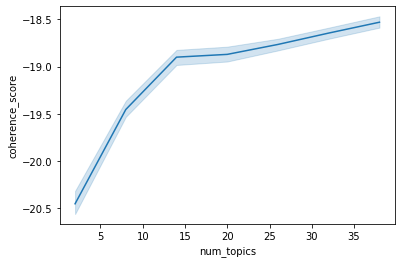

In [0]:
sns.lineplot(x="num_topics", 
             y="coherence_score", 
             data=topic_coherence);
# num_topics = 15?

# LDA - topic modelling 15 topics

In [0]:
num_topics = 15
lda = LdaMulticore(corpus=corpus,
                   id2word=dictionary, # id2word,
                   iterations=5,
                   workers=4,
                   num_topics=num_topics # You can change this parameter
                  )

In [0]:
pyLDAvis.gensim.prepare(lda, corpus, dictionary)

/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
12    -0.004669 -0.007596       1        1  9.139521
4     -0.051549  0.013715       2        1  8.767479
1     -0.062055 -0.012678       3        1  7.387768
9      0.019607  0.010282       4        1  7.008548
10     0.009501 -0.012459       5        1  6.866745
13    -0.005991 -0.027780       6        1  6.786170
11    -0.035409  0.022188       7        1  6.753385
7      0.006664 -0.021411       8        1  6.600522
0      0.016889 -0.019560       9        1  6.493154
2      0.037290 -0.009544      10        1  6.430186
6      0.027304  0.093007      11        1  6.420612
5      0.051648 -0.020987      12        1  6.419081
14     0.010401  0.007914      13        1  4.991362
3      0.001994 -0.026015      14        1  4.979233
8     -0.021625  0.010923      15        1  4.956234, topic_info=     Category      Freq        Term     Total  loglift  logprob
680   Default  3.000000        test  3.000000  30.0000  30.0000
682   Default  5.000000        dogs  5.000000  29.0000  29.0000
224   Default  4.000000        rock  4.000000  28.0000  28.0000
1102  Default  3.000000    clarissa  3.000000  27.0000  27.0000
14    Default  3.000000    wireless  3.000000  26.0000  26.0000
...       ...       ...         ...       ...      ...      ...
977   Topic15  0.726540  assortment  4.604729   1.1580  -5.4769
1077  Topic15  0.574886         hop  3.707365   1.1406  -5.7110
751   Topic15  0.584076   croissant  4.693290   0.9207  -5.6951
70    Topic15  0.548418      tastes  5.411480   0.7153  -5.7581
996   Topic15  0.544787      moment  5.053635   0.7771  -5.7648

[658 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
642      12  0.363343       absolute
494       5  0.320881  accommodating
755      13  0.484930       acquired
895      11  0.449427            act
104       1  0.478356         actual
...     ...       ...            ...
393       9  0.440271          worst
256      11  0.278283            wow
232       2  0.305661           wrap
232       3  0.305661           wrap
975       8  0.455427             ya

[850 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[13, 5, 2, 10, 11, 14, 12, 8, 1, 3, 7, 6, 15, 4, 9])

In [0]:
# display top 5 words of topics
words = [re.findall(r'"([^"]*)"', topic[1]) 
         for topic in lda.print_topics()]
topics = [' '.join(t[0:5]) for t in words]
for t in topics: 
    print(t)

arizona weekends deliver favorites comment
test csc wireless waited expecting
banana spicy piece available dig
rock bomb quirky cakes overly
scratch historic friday fat tip
cartel absolute pricey lil faster
dessert luv cause sale common
available pleasantly hood important nicer
annoying reliable key smaller count
dogs takes energy watered creamy
knowledgeable pet pleasure lost trouble
double gonna results pain drop
actual dark training stayed deal
character trash lost hell ready
bacon version city leaving exposed


In [0]:
def update(doc):
    d_dist = {k:0 for k in range(0, num_topics)}
    for t in doc:
        d_dist[t[0]] = t[1]
    return d_dist

distro = [lda[d] for d in corpus]
new_distro = [update(d) for d in distro]
df_distro = pd.DataFrame.from_records(new_distro)
df_distro.columns = topics
df_distro['stars'] = df_cafe['stars']
print(df_distro.shape)
df_distro.sample(5)

(587, 16)


,arizona weekends deliver favorites comment,test csc wireless waited expecting,banana spicy piece available dig,rock bomb quirky cakes overly,scratch historic friday fat tip,cartel absolute pricey lil faster,dessert luv cause sale common,available pleasantly hood important nicer,annoying reliable key smaller count,dogs takes energy watered creamy,knowledgeable pet pleasure lost trouble,double gonna results pain drop,actual dark training stayed deal,character trash lost hell ready,bacon version city leaving exposed,stars
246,0.000000,0.000000,0.875337,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028366,4.0
523,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.533333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,5.0
538,0.013333,0.813333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,4.0
207,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.813333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,5.0
57,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.766207,0.016667,0.016667,0.017126,0.016667,0.016667,0.016667,0.016667,0.016667,5.0


In [0]:
df_distro.groupby('stars').mean()

,arizona weekends deliver favorites comment,test csc wireless waited expecting,banana spicy piece available dig,rock bomb quirky cakes overly,scratch historic friday fat tip,cartel absolute pricey lil faster,dessert luv cause sale common,available pleasantly hood important nicer,annoying reliable key smaller count,dogs takes energy watered creamy,knowledgeable pet pleasure lost trouble,double gonna results pain drop,actual dark training stayed deal,character trash lost hell ready,bacon version city leaving exposed
stars,,,,,,,,,,,,,,,
1.0,0.167846,0.052993,0.014167,0.014167,0.173951,0.024453,0.097500,0.140480,0.014167,0.094976,0.114203,0.014167,0.014167,0.019657,0.014167
2.0,0.059045,0.054553,0.063312,0.033561,0.035304,0.076160,0.068089,0.013059,0.023392,0.069260,0.099033,0.088745,0.070329,0.130818,0.051767
3.0,0.059311,0.087023,0.061300,0.038532,0.060220,0.090753,0.052252,0.061460,0.059848,0.081465,0.056930,0.084059,0.059399,0.050259,0.058970
4.0,0.047207,0.066569,0.055280,0.064596,0.072160,0.085428,0.064507,0.085581,0.038706,0.054685,0.071248,0.069008,0.070450,0.068871,0.054152
5.0,0.071023,0.073105,0.061576,0.062331,0.083590,0.056649,0.075665,0.056298,0.060257,0.064858,0.069978,0.050834,0.072589,0.065671,0.051913


# LSI - topic modelling

In [0]:
# Build the LSI model
num_topics= 5
lsi = LsiModel(corpus=corpus, 
               num_topics=num_topics, 
               id2word=dictionary)
lsi.print_topics()

[(0,
  '0.511*"banana" + 0.296*"listening" + 0.198*"immediately" + 0.197*"month" + 0.116*"starts" + 0.112*"tastes" + 0.112*"regret" + 0.110*"continue" + 0.109*"piece" + 0.109*"growing"'),
 (1,
  '0.298*"soda" + 0.225*"italian" + 0.210*"ham" + 0.206*"lemonade" + 0.199*"reminded" + 0.199*"juice" + 0.198*"balance" + 0.155*"pre" + 0.133*"clothes" + 0.132*"sodas"'),
 (2,
  '-0.284*"wearing" + -0.218*"sofa" + -0.209*"kept" + -0.196*"competition" + -0.188*"body" + 0.180*"soda" + -0.155*"friday" + 0.132*"italian" + -0.129*"settled" + 0.128*"lemonade"'),
 (3,
  '0.213*"wearing" + -0.204*"step" + -0.198*"slowly" + -0.185*"hold" + 0.149*"sofa" + 0.137*"body" + 0.135*"competition" + 0.133*"kept" + -0.131*"indian" + -0.131*"basically"'),
 (4,
  '-0.270*"starts" + -0.258*"noise" + -0.243*"random" + -0.152*"crazy" + -0.144*"permit" + -0.140*"background" + -0.139*"performance" + -0.139*"expecting" + -0.137*"figure" + -0.136*"lost"')]

In [0]:
# display top 10 words of topics
words = [re.findall(r'"([^"]*)"', topic[1]) 
         for topic in lsi.print_topics()]
topics = [' '.join(t[0:5]) for t in words]
for t in topics: 
    print(t)

banana listening immediately month starts
soda italian ham lemonade reminded
wearing sofa kept competition body
wearing step slowly hold sofa
starts noise random crazy permit


# LSI - topic modelling similarity

In [0]:
# Could do similarity comparison with LDA as well
review_sample = df_cafe.loc[338, 'text']
print(review_sample)
print(tokenizer(review_fake))
bow = dictionary.doc2bow(tokenizer(review_fake))
print(lsi[bow])
# This result suggests that topic 1 has the strongest 
# representation in this text.
# topic 1: soda italian ham lemonade reminded
# soda? lol

This place is so cute. So my best friend and I were originally gonna go somewhere else but it was 21 and over and she's not. Then we tried to go to Jobot. But we didn't realize it was First Friday and I didn't want to be in the mix of that. Too busy and too crowded for my liking. Well she found this place. Apparently it used to be a gas station. It looks like it might be drive through. But it's trendy/hipster and I love it. It's a smaller place but that's still cool. Also when it's your first time, you get a free pastry. So that's pretty awesome! I got a chai cupcake and my best friend got a oatmeal cookie. Both of which are big! Lol so I recommend splitting or saving for later. The coffee is good. I got a white mocha iced latte. My best friend doesn't like coffee so she got a coke lol. But it was in one of the older bottles so that was cool. It's in downtown Phoenix but it's not like the most ghetto part of Phoenix either. I was very pleased with my experience here. I can't wait to co

In [0]:
from gensim import similarities
lsi_index = similarities.MatrixSimilarity(lsi[corpus])
 
# Let's perform some queries
similarities = lsi_index[lsi[bow]]
# Sort the similarities
similarities = sorted(enumerate(similarities), key=lambda item: -item[1])
 
# Top most similar documents:
print(similarities[:10])

[(338, 1.0), (273, 0.997083), (284, 0.9952047), (444, 0.99457896), (0, 0.98633313), (322, 0.98366374), (177, 0.9822863), (236, 0.9794321), (153, 0.9762022), (272, 0.97546655)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
# Let's see what's the most similar document
document_id, similarity = similarities[1]
print(document_id)
print(df_cafe['text'][document_id])

273
I'm waiting here at Copper Star as my car gets an oil change. The free wifi is a nice perk since I'm supposed to be working right now, but it doesn't make up for the bland toffee coffee ice blended ($4.25 for 16 oz) and greasy crumbly red velvet cupcake ($2.50). 

It's a cute shop though and I'm all about supporting local businesses so I'll give them another shot next time I'm in the area.
